1) Domain: Botany, seeds, wheat, kernels, agriculture used for clustering.

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

2) Problem Statement: inputs 7 features. output types/classes of wheat

Description of kernels of wheat with dimentional measurement. We will train a clasification model to output.

3) Pairplot



Notes and Questions:

1) 

In [56]:
cd /home/sleepsux/uclax-data-science/02-iris-06-likelihood-and-clustering

/home/sleepsux/uclax-data-science/02-iris-06-likelihood-and-clustering


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from patsy import dmatrices
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from time import time
from tqdm import tqdm
from bic import BIC

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

%matplotlib inline



In [58]:
#seedsdataurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
#pd.read_csv(seedsdataurl, sep=r"\s+", header=None)

<Figure size 1440x1440 with 0 Axes>

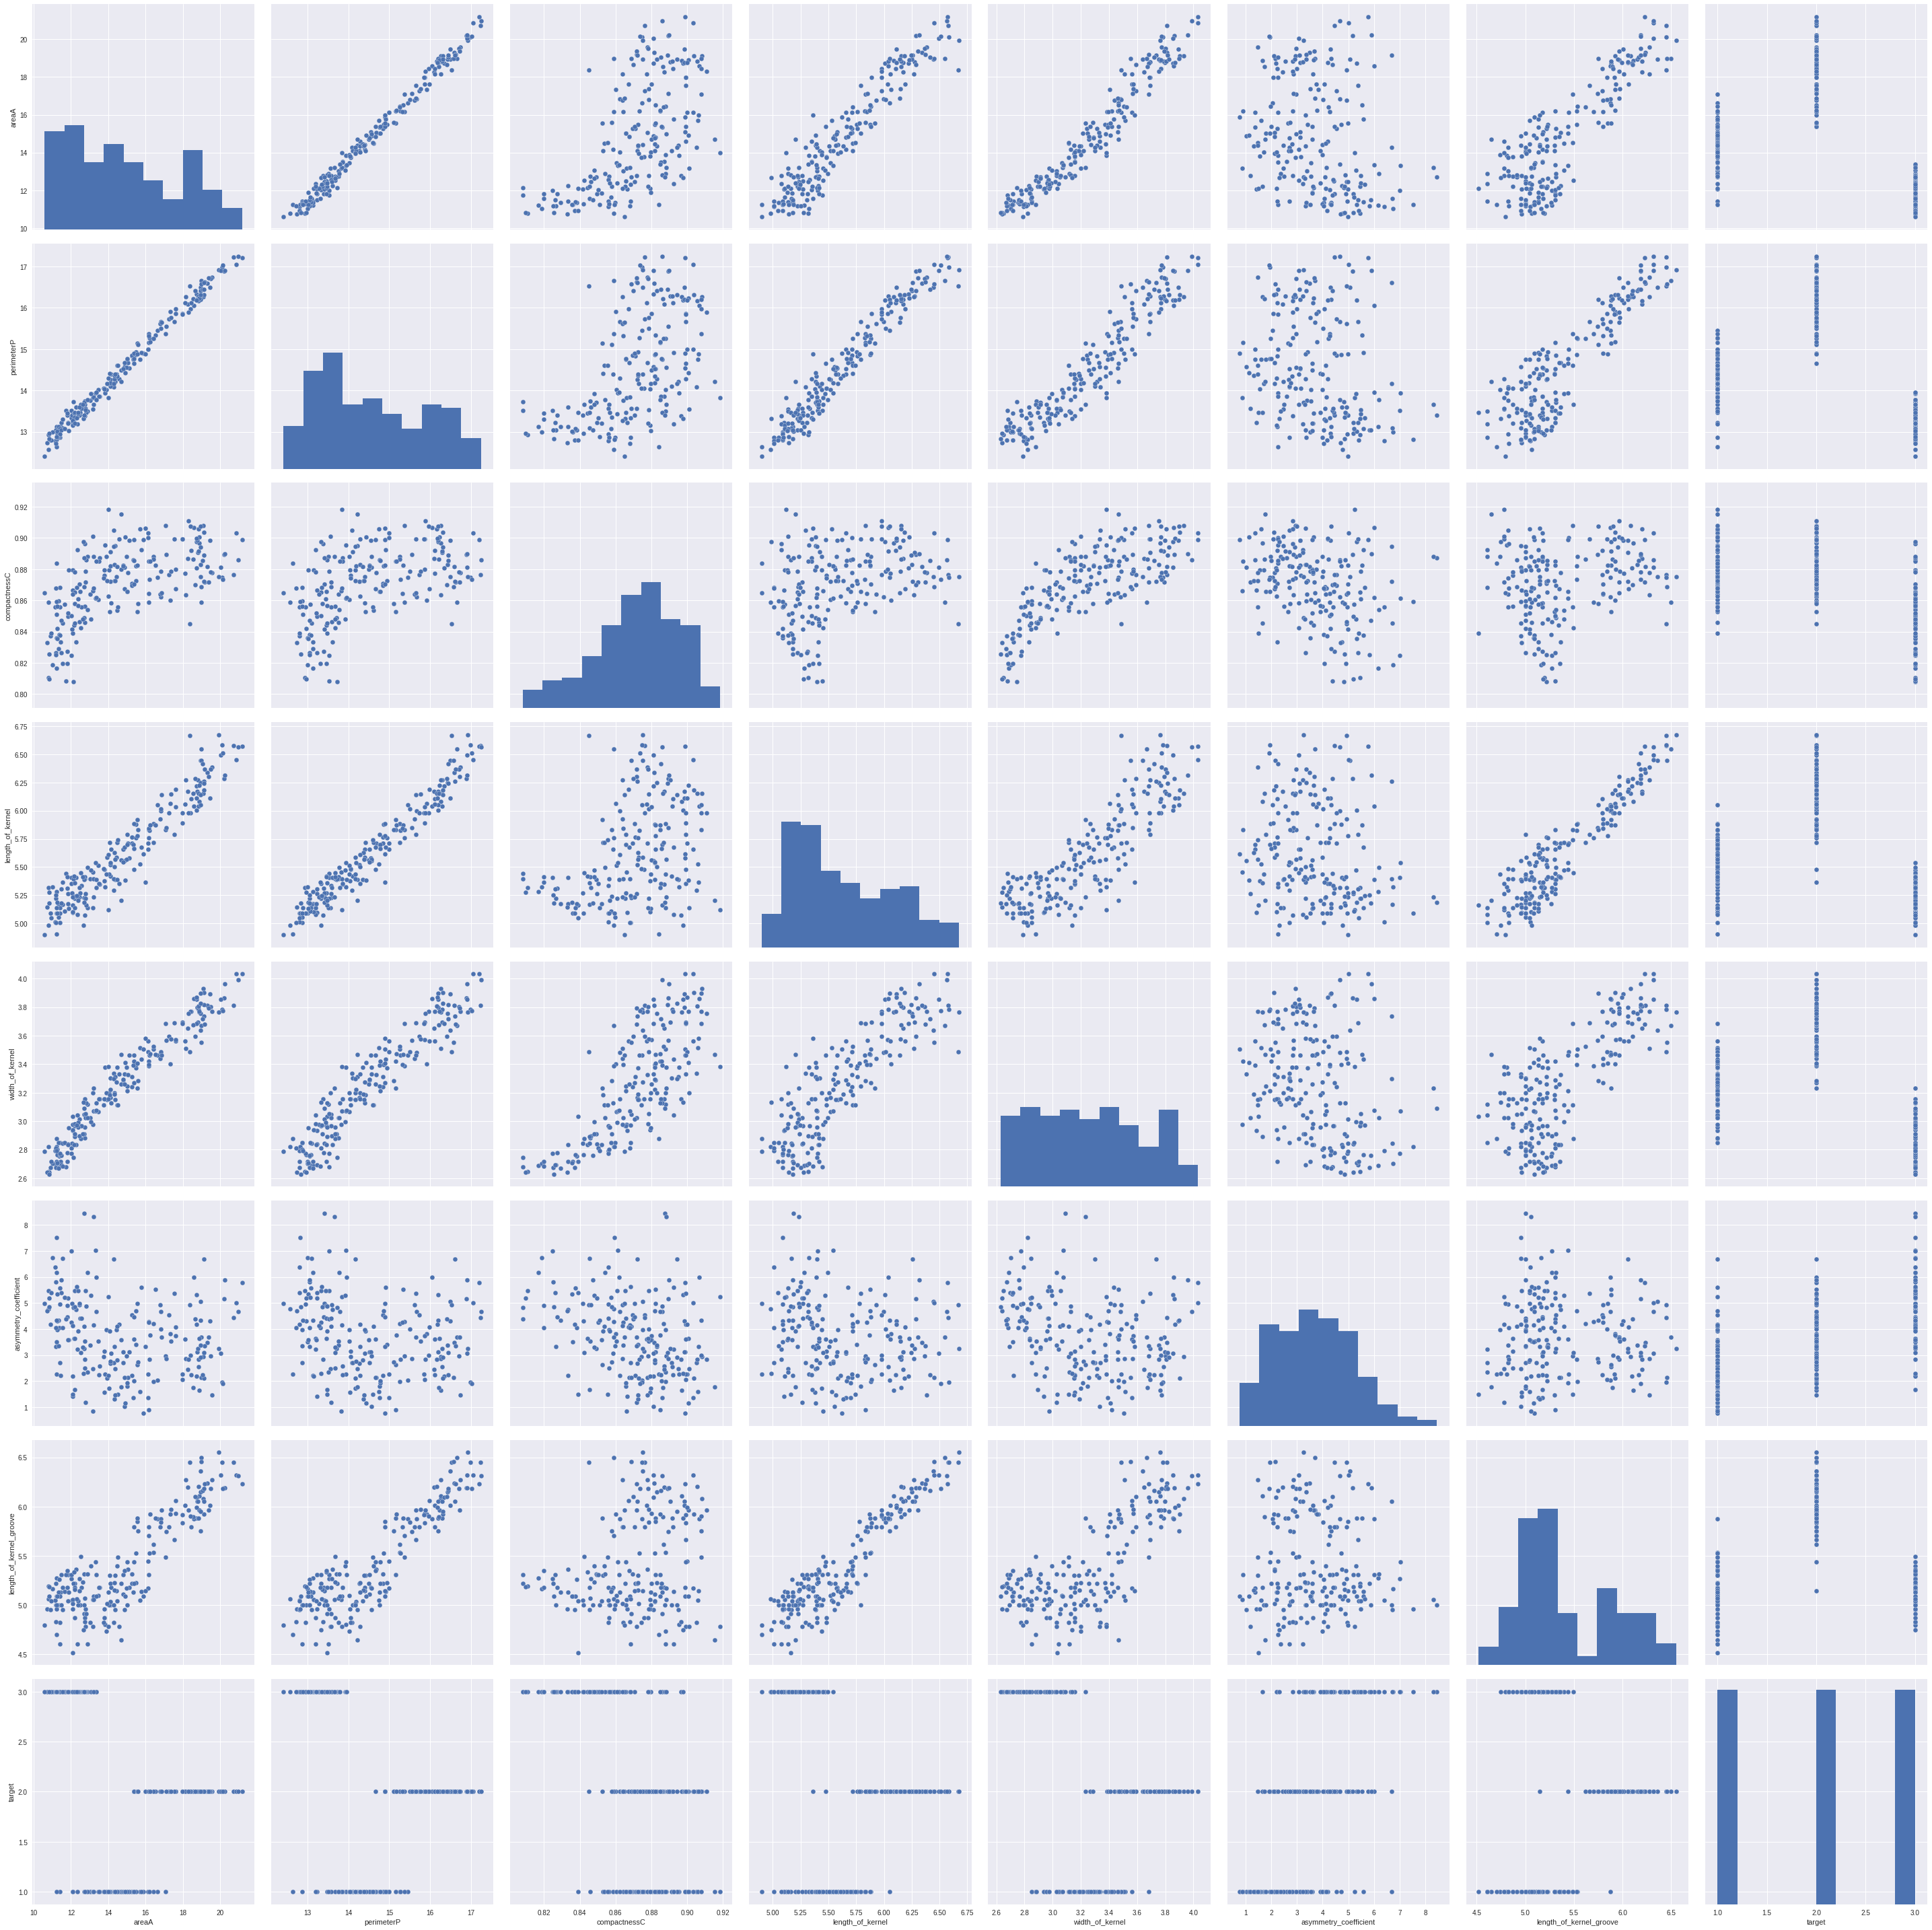

In [59]:
plt.figure(1, (20,20))
seedsdataurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

csvdata = pd.read_csv(seedsdataurl, sep=r"\s+", header=None)

dataH = ['areaA', 'perimeterP', 'compactnessC', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'target' ]

seeds_df = pd.DataFrame(csvdata)
seeds_df.columns = dataH

sns.pairplot(seeds_df, size=5)

### Build a Simple Regression Model

### kernel length ~ kernel groove length

Q1

Is it ok that i built a regression model to predict the kernel length based on kernel groove length?
Am i supposed to use all the data involved since there are three different types of kernals?
Wouldn't it be more precise if made regression models only based on each type instead of all three?

data=seeds_df.head(69)

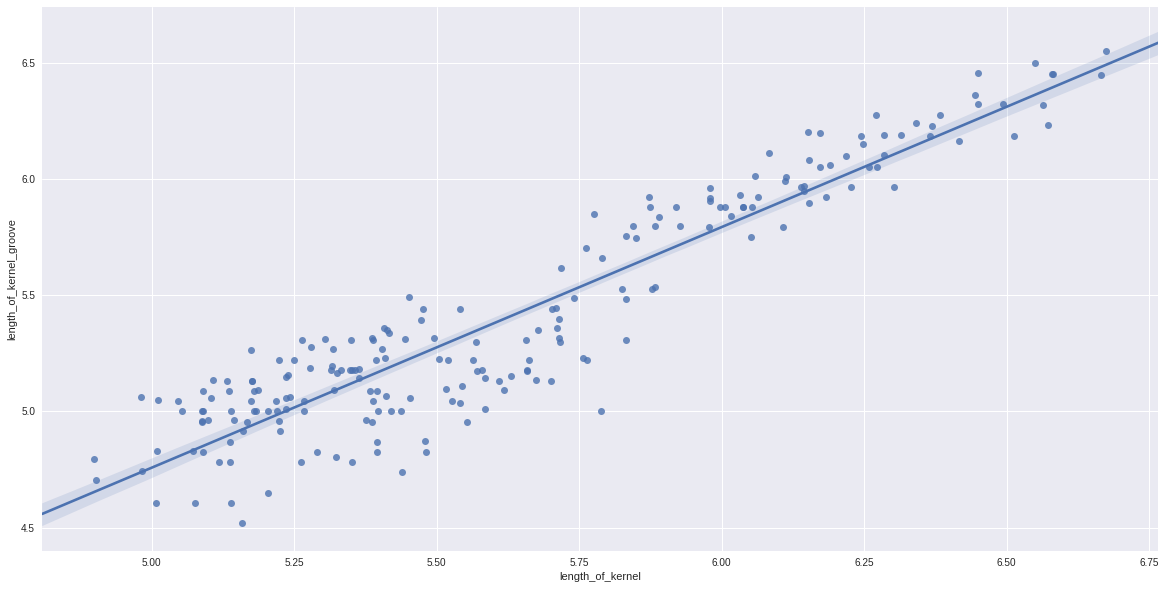

In [60]:
plt.figure(1, (20,10))

sns.regplot('length_of_kernel', 'length_of_kernel_groove', data=seeds_df)

Q2 

Why are all the red X's off the line?
Is it because of the the 3 different kernal types i used?

In [61]:
seeds1 = seeds_df.head(69)
target, features = dmatrices("length_of_kernel ~ length_of_kernel_groove", seeds1)

linear_regression_model = LinearRegression()
linear_regression_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

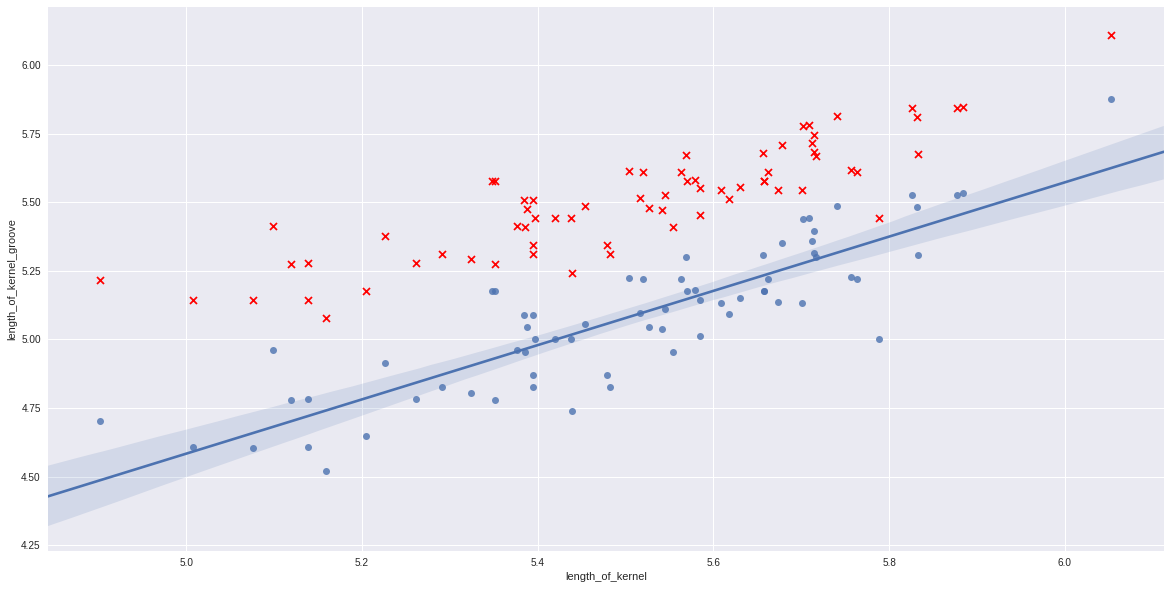

In [62]:
plt.figure(1, (20,10))
sns.regplot('length_of_kernel', 'length_of_kernel_groove', seeds1)

predictions = linear_regression_model.predict(features)
plt.scatter(seeds1.length_of_kernel, predictions, marker='x', color='red')

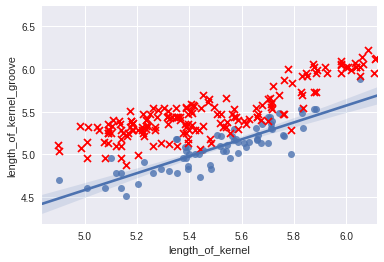

In [63]:
target, features = dmatrices("length_of_kernel ~ length_of_kernel_groove", seeds_df)

linear_regression_model = LinearRegression()
linear_regression_model.fit(features, target)
sns.regplot('length_of_kernel', 'length_of_kernel_groove', seeds1)

predictions = linear_regression_model.predict(features)
plt.scatter(seeds_df.length_of_kernel, predictions, marker='x', color='red')

### Train-Split

In [64]:
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

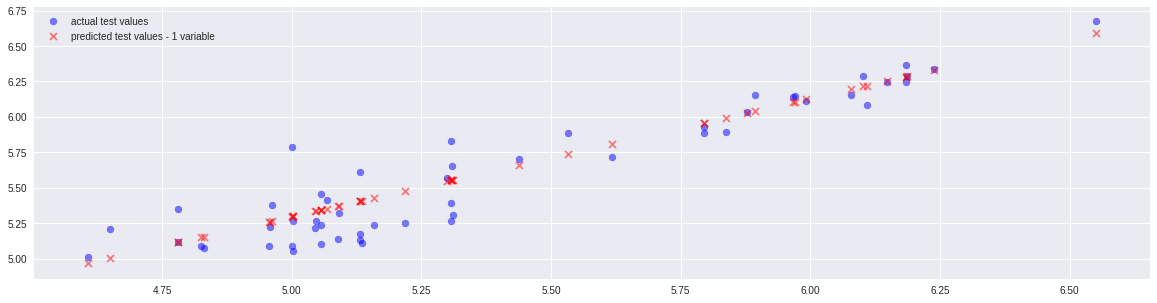

In [65]:
(features_train.shape,
 target_train.shape,
 features_test.shape,
 target_test.shape)

features_test[:7]

linear_regression_model = LinearRegression(fit_intercept=False)
#what is this fit intercept true or false?

linear_regression_model.fit(features_train, target_train)

kernel_length_prediction_1_var = (linear_regression_model.predict(features_test))

plt.figure(1, (20,5))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, 
            label='actual test values')
plt.scatter(features_test[:, 1], kernel_length_prediction_1_var,
            marker='x', color='red', alpha=0.5, 
            label='predicted test values - 1 variable')
plt.legend()

In [66]:
np.save('data/kernel_length_prediction_1_var', kernel_length_prediction_1_var)

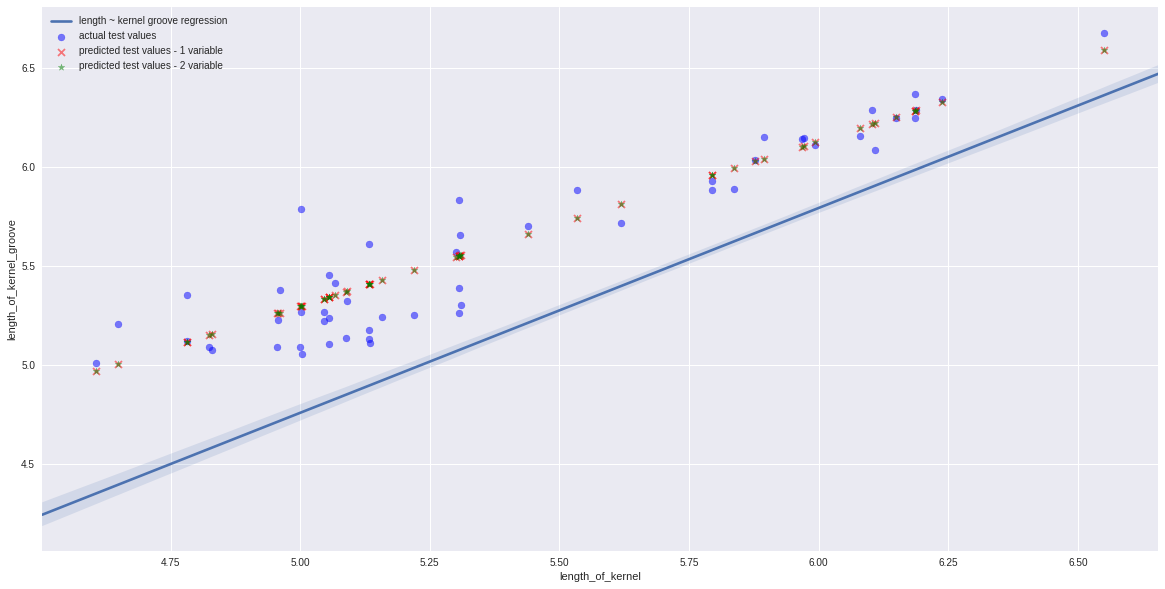

In [67]:
kernel_length_prediction_1_var = np.load('data/kernel_length_prediction_1_var.npy')

target, features = dmatrices("length_of_kernel ~ length_of_kernel_groove", seeds_df)

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)

kernel_length_prediction_2_var = linear_regression_model.predict(features_test)

plt.figure(1, (20,10))


plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, label='actual test values')
plt.scatter(features_test[:, 1], kernel_length_prediction_1_var,
            marker='x', color='red', alpha=0.5, label='predicted test values - 1 variable')
plt.scatter(features_test[:, 1], kernel_length_prediction_2_var,
            marker='*', color='green', alpha=0.5, label='predicted test values - 2 variable')
sns.regplot('length_of_kernel', 'length_of_kernel_groove', data=seeds_df, scatter=False, label='length ~ kernel groove regression')
plt.legend()

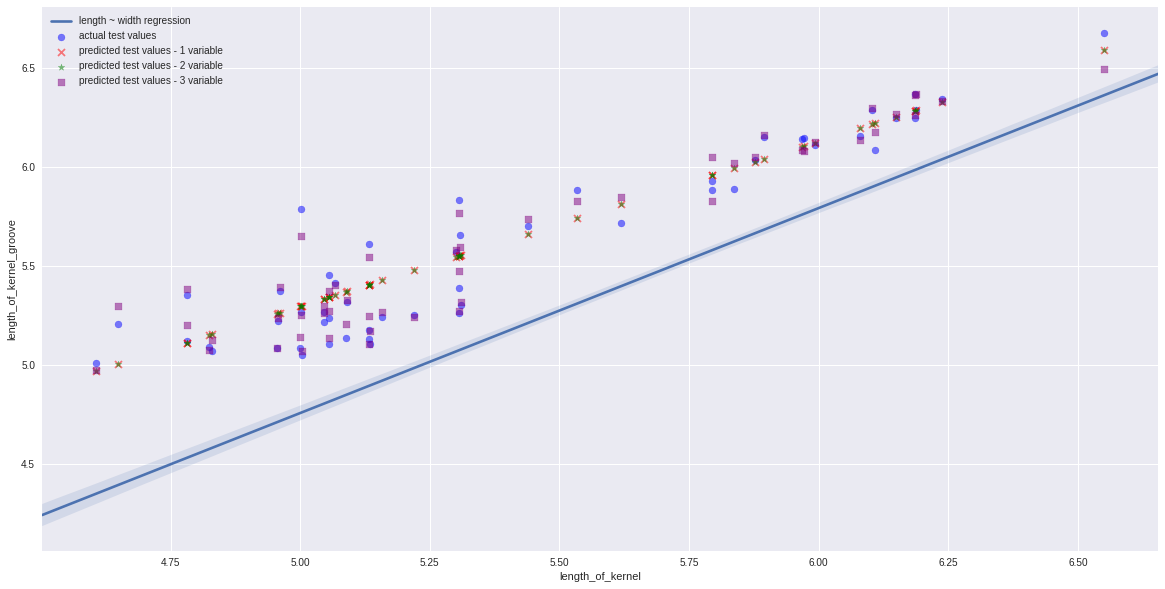

In [68]:
target, features = dmatrices("length_of_kernel ~ length_of_kernel_groove + perimeterP + areaA", seeds_df)

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)
kernel_length_prediction_3_var = linear_regression_model.predict(features_test)

plt.figure(1, (20,10))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, label='actual test values')
plt.scatter(features_test[:, 1], kernel_length_prediction_1_var,
            marker='x', color='red', alpha=0.5, label='predicted test values - 1 variable')
plt.scatter(features_test[:, 1], kernel_length_prediction_2_var,
            marker='*', color='green', alpha=0.5, label='predicted test values - 2 variable')
plt.scatter(features_test[:, 1], kernel_length_prediction_3_var,
            marker='s', color='purple', alpha=0.5, label='predicted test values - 3 variable')
sns.regplot('length_of_kernel', 'length_of_kernel_groove', data=seeds_df, scatter=False, label='length ~ width regression')

plt.legend()

In [69]:
x_values = features_test[:, 1]
y_values = target_test
y_hat_1_values = kernel_length_prediction_1_var
y_hat_2_values = kernel_length_prediction_2_var
y_hat_3_values = kernel_length_prediction_3_var

y_hat = (y_hat_1_values, y_hat_2_values, y_hat_3_values)

points = list(zip(x_values, y_values, y_hat_1_values, y_hat_2_values, y_hat_3_values))

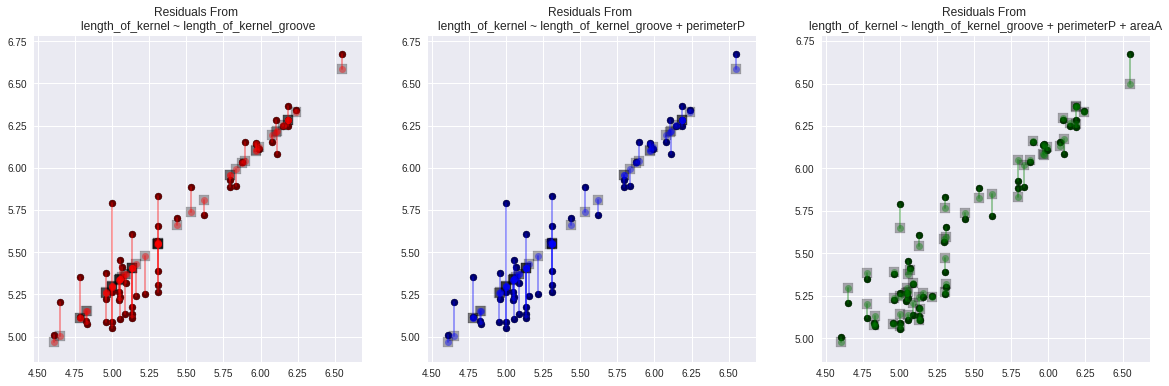

In [70]:
_, ax = plt.subplots(1,3,figsize=(20,6))

for point in points:
    x, y, y_hat_1, y_hat_2, y_hat_3 = point
    ax[0].plot([x,x], [y,y_hat_1], 'ro-', alpha=0.4)
    ax[0].set_title('Residuals From \nlength_of_kernel ~ length_of_kernel_groove')
    ax[1].plot([x,x], [y,y_hat_2], 'bo-', alpha=0.4)
    ax[1].set_title('Residuals From \nlength_of_kernel ~ length_of_kernel_groove + perimeterP')
    ax[2].plot([x,x], [y,y_hat_3], 'go-', alpha=0.4)
    ax[2].set_title('Residuals From \nlength_of_kernel ~ length_of_kernel_groove + perimeterP + areaA')

for i, a in enumerate(ax):    
    a.scatter(features_test[:, 1],
              target_test, marker='o', color='black')
    a.scatter(features_test[:, 1],
              y_hat[i], marker='s', s=100, alpha=0.3, color='black')

Classification

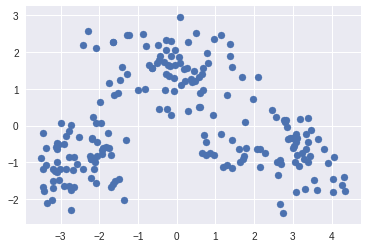

In [71]:
#make the data 2D

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(seeds_df)
seeds_2d = pca.fit_transform(features_scaled)
plt.scatter(seeds_2d[:, 0], seeds_2d[:, 1])

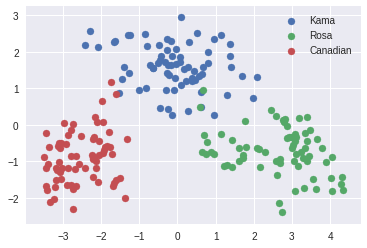

In [72]:

targets = seeds_df.target

targets = np.array(np.array([x-1 for x in targets]))

wheatL = np.array(['Kama','Rosa','Canadian'])

named_target = np.array([wheatL[i] for i in targets])

for label in wheatL:
    group_mask = named_target == label
    group = seeds_2d[group_mask]
    plt.scatter(group[:, 0], group[:, 1], label=label)
plt.legend()



Regression

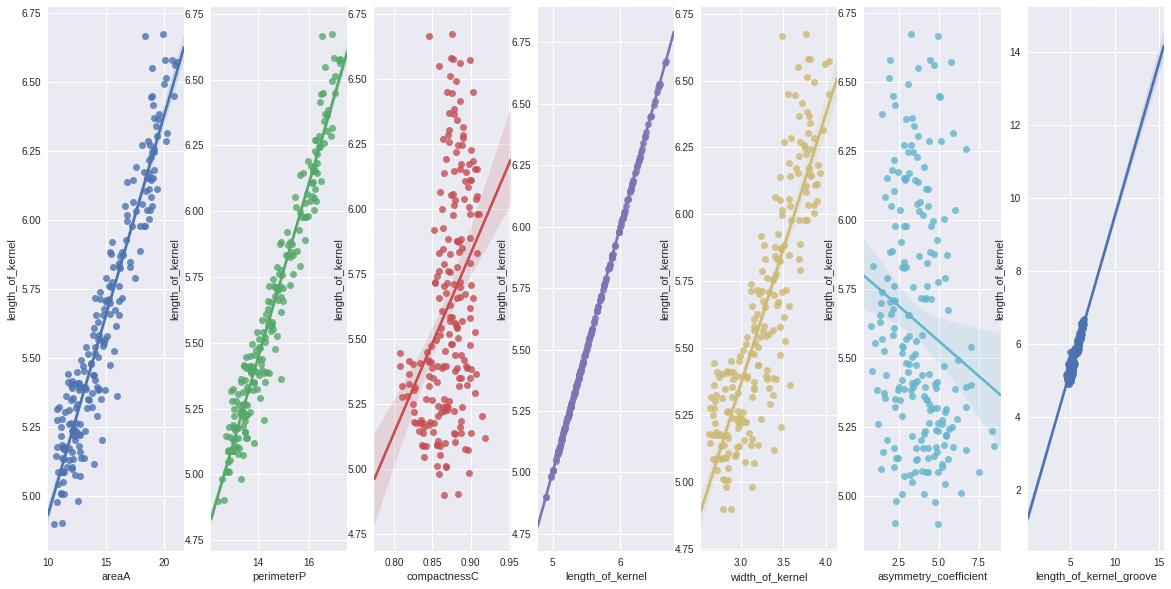

In [73]:
_, ax = plt.subplots(1,7, figsize=(20,10))

for i in range(7):
    sns.regplot(dataH[i], dataH[3], 
                data=seeds_df, ax=ax[i])

### Evaluate the Regression Models Using Mean Squared Error

In [74]:
def MSE(actual, predicted):
    return sum((actual - predicted)**2)/len(actual)

linear_models = [LinearRegression(),
                    LinearRegression(),
                    LinearRegression(),
                    LinearRegression(),
                    LinearRegression(),
                    LinearRegression(),
                    LinearRegression()]

for feature, model in zip(dataH[:7], linear_models):
    features = seeds_df[[feature]]
    target = seeds_df['length_of_kernel']
    model.fit(features, target)
    
for feature, model in zip(dataH[:7], linear_models):
    features = seeds_df[[feature]]
    target = seeds_df['length_of_kernel']
    print("Scoring linear regression model fit with %s." % feature)
    print("MSE: %f" % MSE(target, model.predict(features)))

Scoring linear regression model fit with areaA.
MSE: 0.019054
Scoring linear regression model fit with perimeterP.
MSE: 0.010627
Scoring linear regression model fit with compactnessC.
MSE: 0.168925
Scoring linear regression model fit with length_of_kernel.
MSE: 0.000000
Scoring linear regression model fit with width_of_kernel.
MSE: 0.050735
Scoring linear regression model fit with asymmetry_coefficient.
MSE: 0.189620
Scoring linear regression model fit with length_of_kernel_groove.
MSE: 0.025373


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


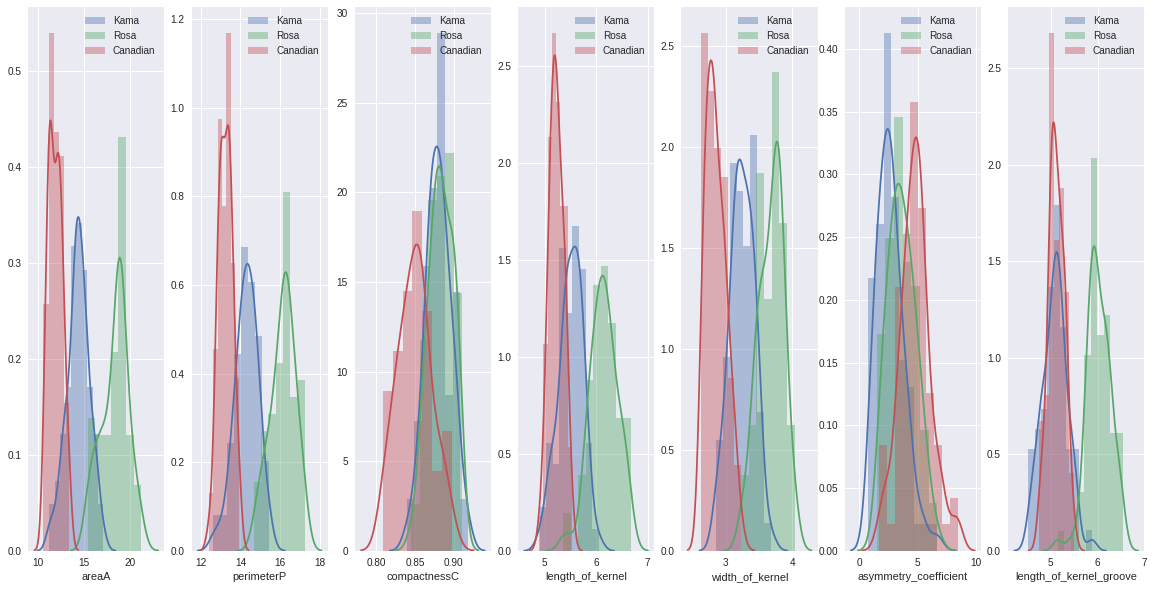

In [75]:

seeds_df['targetNamed'] = named_target

seeds_df['targetNamed']
_, ax = plt.subplots(1,7, figsize=(20,10))

for i in range(7):
    for seeds_class in seeds_df.targetNamed.unique():
        plotting_df = seeds_df[seeds_df.targetNamed == seeds_class ]
        sns.distplot(plotting_df[dataH[i]], ax=ax[i], label=seeds_class)
        ax[i].legend()

### Display the Classification Predictions and Actual

In [76]:
tree = DecisionTreeClassifier()
features = seeds_df.drop('target', axis=1)
features = features.drop('targetNamed', axis=1)
target_numerical = LabelEncoder().fit_transform(seeds_df['target'])

In [77]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features, target_numerical, random_state=11)

tree.fit(features_train, target_train)
target_prediction = tree.predict(features_validation)
target_prediction

array([1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 0, 2, 1, 0, 2])

In [78]:
target_validation

array([1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 0, 2, 1, 0, 0])

In [79]:
difference = np.abs(target_validation - target_prediction)
difference

array([0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2])

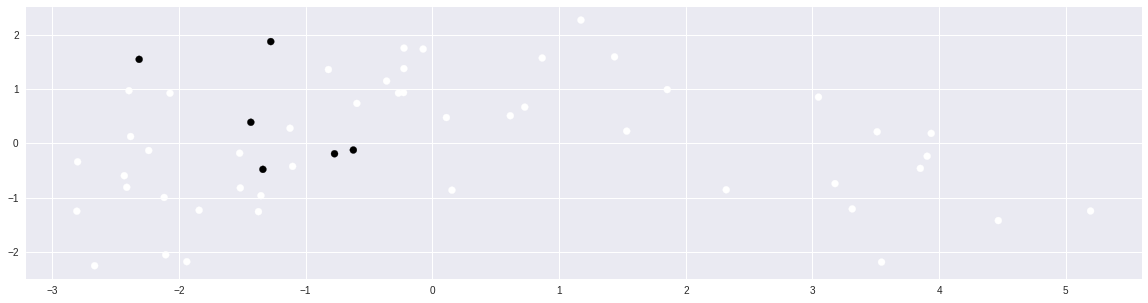

In [80]:
number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(features_validation)
seeds_2d = pca.fit_transform(features_scaled)

plt.figure(figsize=(20,5))
plt.scatter(x=seeds_2d[:,0], y=seeds_2d[:,1], c=difference)

### Measure the Accuracy

In [81]:
def accuracy(actual, predicted):
    return sum(np.abs(actual - predicted))/len(actual)

accuracy(target_validation, target_prediction)

0.22641509433962265

### Clustering

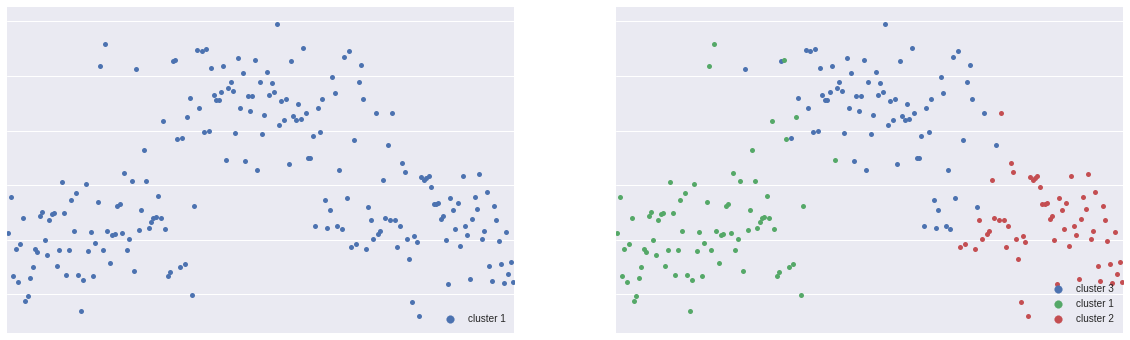

In [82]:
number_of_dimensions = 2
pca = PCA(number_of_dimensions)

seeds_df_d = seeds_df.drop('targetNamed', axis=1)

features_scaled = StandardScaler().fit_transform(seeds_df_d)
seeds_2d = pca.fit_transform(features_scaled)

number_of_clusters = [1,3]

_, ax = plt.subplots(1,2, figsize=(20,6))

for i, clusters in enumerate(number_of_clusters):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(seeds_df_d)
    labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    sns.swarmplot(x=seeds_2d[:,0], y=seeds_2d[:,1], hue=labels, ax=ax[i])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].legend(loc='lower right')

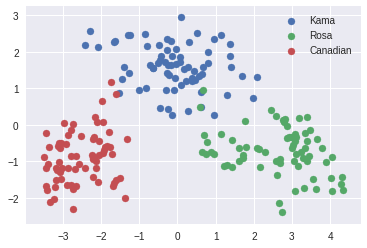

In [83]:
for label in wheatL:
    group_mask = np.array([wheatL[n-1] for n in seeds_df.target]) == label
    group = seeds_2d[group_mask]
    plt.scatter(group[:, 0], group[:, 1], label=label)
plt.legend()

### Prepare an Error Plot of all seven Features as a Function of n

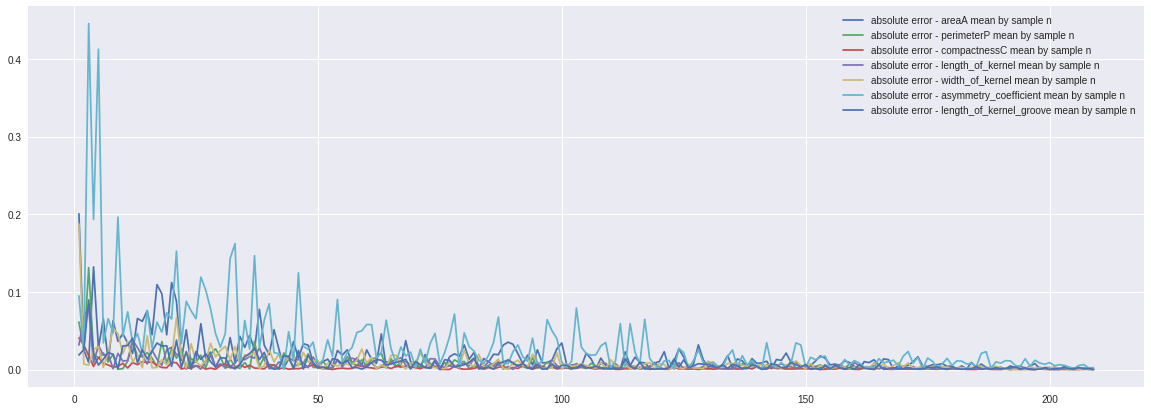

In [84]:
plt.rc('figure', figsize=(20, 7))

def feature_error_by_n(data, feature, n):
    sample = data[feature].sample(n)
    error = np.abs((data[feature].mean() - sample.mean())/data[feature].mean())
    return error

areaA_error_by_n = [feature_error_by_n(seeds_df, 'areaA', n) for n in range(1,210)]
plt.plot(range(1,210), areaA_error_by_n, label='absolute error - areaA mean by sample n')
plt.legend()

perimeterP_error_by_n = [feature_error_by_n(seeds_df, 'perimeterP', n) for n in range(1,210)]
plt.plot(range(1,210), perimeterP_error_by_n, label='absolute error - perimeterP mean by sample n')
plt.legend()

compactnessC_error_by_n = [feature_error_by_n(seeds_df, 'compactnessC', n) for n in range(1,210)]
plt.plot(range(1,210), compactnessC_error_by_n, label='absolute error - compactnessC mean by sample n')
plt.legend()

length_of_kernel_error_by_n = [feature_error_by_n(seeds_df, 'length_of_kernel', n) for n in range(1,210)]
plt.plot(range(1,210), length_of_kernel_error_by_n, label='absolute error - length_of_kernel mean by sample n')
plt.legend()

width_of_kernel_error_by_n = [feature_error_by_n(seeds_df, 'width_of_kernel', n) for n in range(1,210)]
plt.plot(range(1,210), width_of_kernel_error_by_n, label='absolute error - width_of_kernel mean by sample n')
plt.legend()

asymmetry_coefficient_error_by_n = [feature_error_by_n(seeds_df, 'asymmetry_coefficient', n) for n in range(1,210)]
plt.plot(range(1,210), asymmetry_coefficient_error_by_n, label='absolute error - asymmetry_coefficient mean by sample n')
plt.legend()

length_of_kernel_groove_error_by_n = [feature_error_by_n(seeds_df, 'length_of_kernel_groove', n) for n in range(1,210)]
plt.plot(range(1,210), length_of_kernel_groove_error_by_n, label='absolute error - length_of_kernel_groove mean by sample n')
plt.legend()

### Visualizing the Distributions of the Features

(-1, 25)

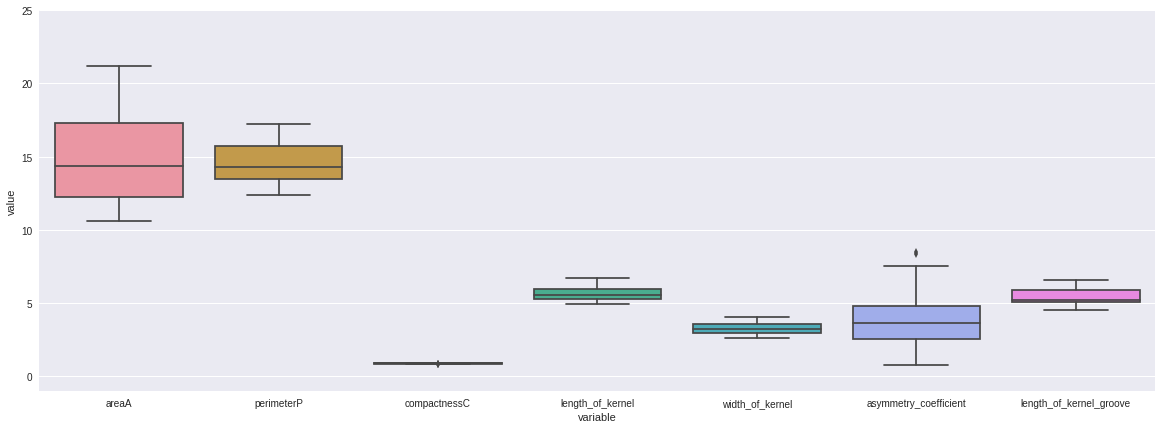

In [85]:
seeds_melt = pd.melt(seeds_df.select_dtypes([float]))

fig = plt.figure(figsize=(20,7))
sns.boxplot(x='variable', y='value', data=seeds_melt)
plt.ylim(-1,25)

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


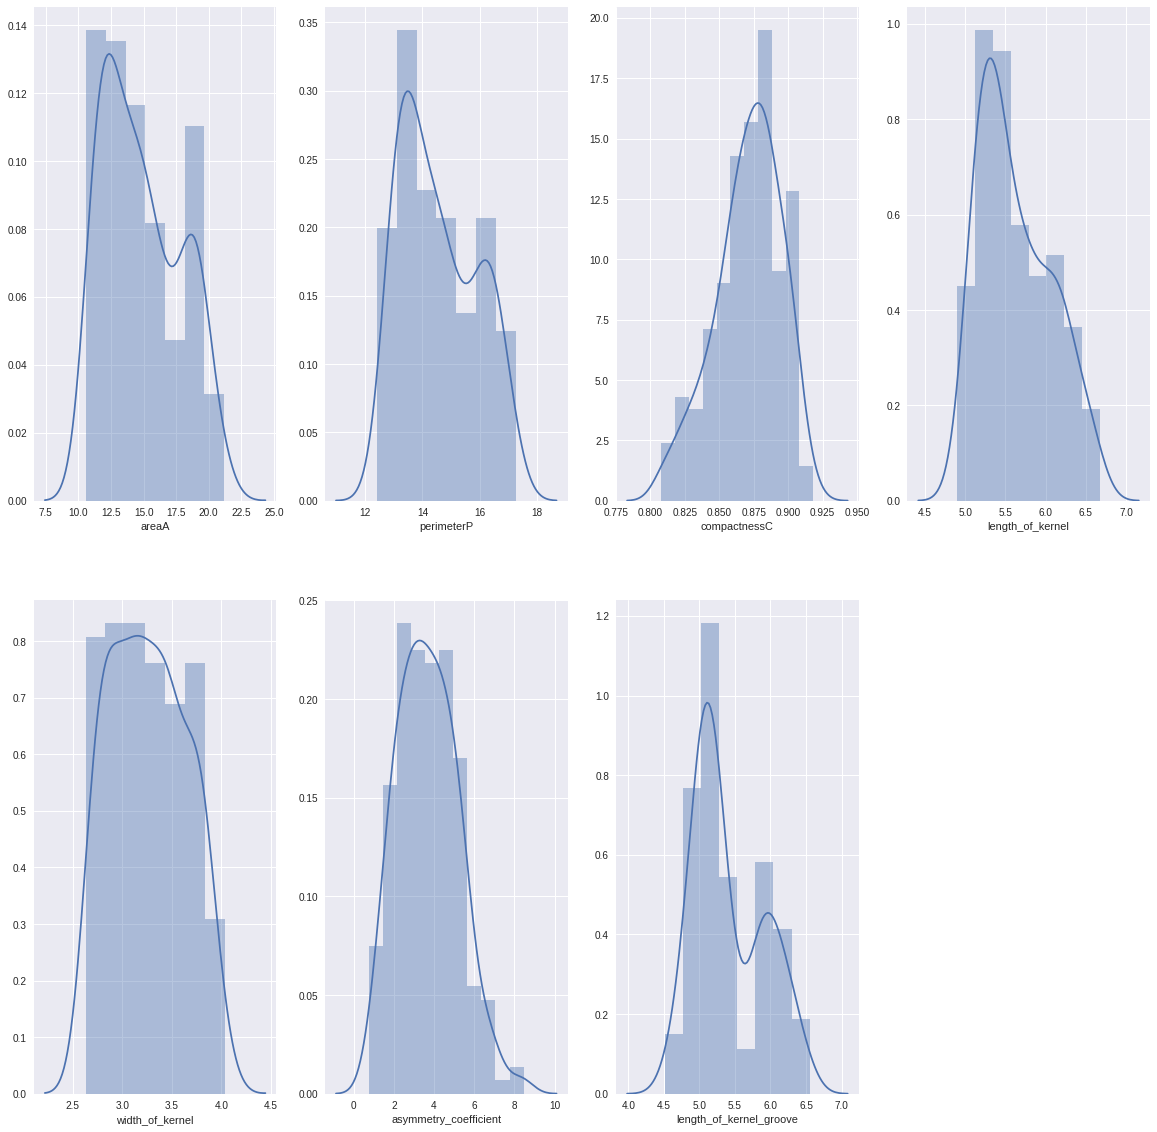

In [86]:
#_, ax = plt.subplots(1,7, figsize=(20,7))
fig = plt.figure(figsize=(20,20))
seeds_numerical_df = seeds_df.select_dtypes([float])

for i, feat in enumerate(seeds_numerical_df.columns):
    fig.add_subplot(2,4,i+1)
    sns.distplot(seeds_numerical_df[feat])
    #ax[i].set_xlim(0,25)
    #ax[i].set_ylim(0,.6)
    #ax[i].axvline(seeds_numerical_df[feat].mean())

# Sampling the Dataset

In [87]:
sample_1 = seeds_df.sample(5)
sample_1

,areaA,perimeterP,compactnessC,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,target,targetNamed
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3,Canadian
15,14.59,14.28,0.8993,5.351,3.333,4.185,4.781,1,Kama
162,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,3,Canadian
185,11.56,13.31,0.8198,5.363,2.683,4.062,5.182,3,Canadian
195,12.80,13.47,0.8860,5.160,3.126,4.873,4.914,3,Canadian


In [88]:
seeds_df.describe().T

,count,mean,std,min,25%,50%,75%,max
areaA,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeterP,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactnessC,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length_of_kernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width_of_kernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry_coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
length_of_kernel_groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
target,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [89]:
sample_1.describe().T

,count,mean,std,min,25%,50%,75%,max
areaA,5.0,12.73400,1.151013,11.5600,12.0500,12.670,12.8000,14.5900
perimeterP,5.0,13.55800,0.408987,13.3100,13.3200,13.410,13.4700,14.2800
compactnessC,5.0,0.86888,0.036063,0.8198,0.8416,0.886,0.8977,0.8993
length_of_kernel,5.0,5.22500,0.157313,4.9840,5.1600,5.267,5.3510,5.3630
width_of_kernel,5.0,3.02480,0.257785,2.6830,2.8470,3.126,3.1350,3.3330
asymmetry_coefficient,5.0,4.08160,1.076226,2.3000,4.0620,4.185,4.8730,4.9880
length_of_kernel_groove,5.0,4.93360,0.182741,4.7450,4.7810,4.914,5.0460,5.1820
target,5.0,2.60000,0.894427,1.0000,3.0000,3.000,3.0000,3.0000


## Visualize the Differences Using Seaborn

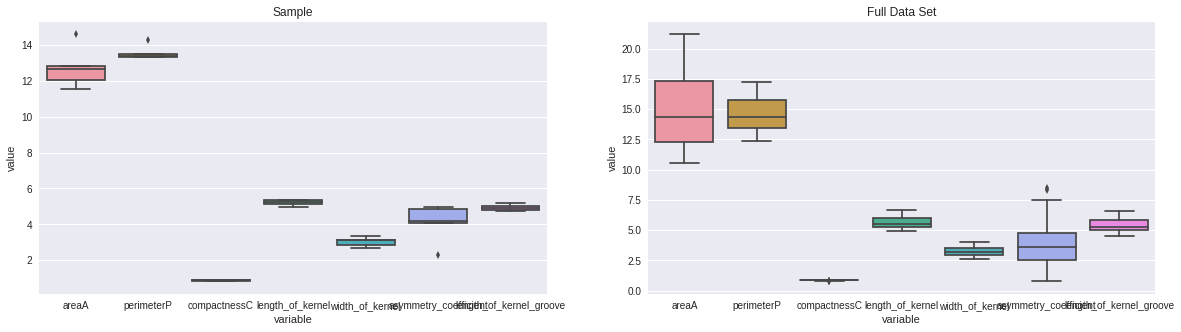

In [90]:
sample_1_melt = pd.melt(sample_1.select_dtypes([float]))

_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.boxplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.boxplot(x='variable', y='value', data=seeds_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

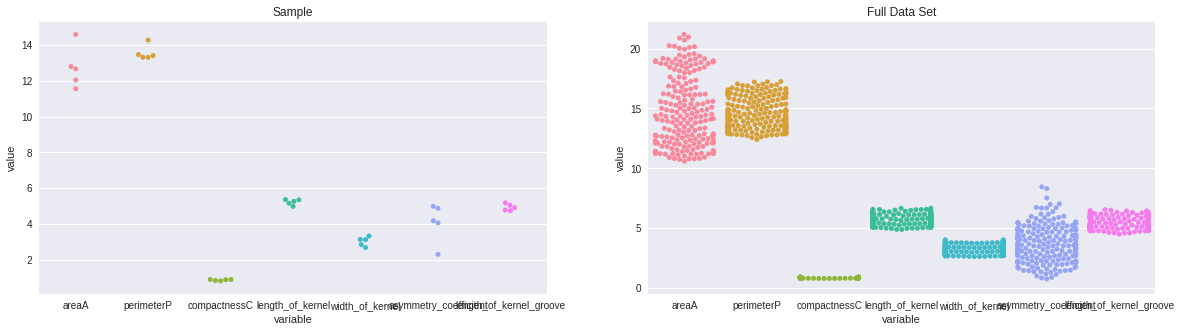

In [91]:
_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.swarmplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.swarmplot(x='variable', y='value', data=seeds_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

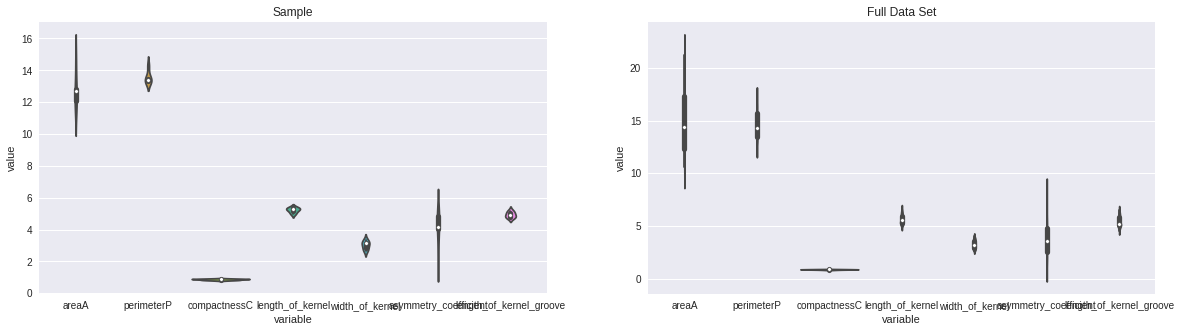

In [92]:
_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.violinplot(x='variable', y='value', data=sample_1_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.violinplot(x='variable', y='value', data=seeds_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

In [93]:
error_sample_1 = np.abs(seeds_df.mean() - sample_1.mean())
error_sample_1


areaA                      2.113524
perimeterP                 1.001286
compactnessC               0.002119
length_of_kernel           0.403533
width_of_kernel            0.233805
asymmetry_coefficient      0.381399
length_of_kernel_groove    0.474471
target                     0.600000
dtype: float64

In [94]:
error_sample_1_normalized = np.abs((seeds_df.mean() - sample_1.mean())/seeds_df.mean())
error_sample_1_normalized

areaA                      0.142349
perimeterP                 0.068773
compactnessC               0.002432
length_of_kernel           0.071694
width_of_kernel            0.071750
asymmetry_coefficient      0.103075
length_of_kernel_groove    0.087734
target                     0.300000
dtype: float64

### Calculating BIC for KMEANS

In [95]:
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time' : end, 'model' : model}

def process_results(results_list, data):
    df = pd.DataFrame(results_list)
    df['k'] = df.model.apply(lambda x: x.n_clusters)
    df['bic'] = df.model.apply(lambda x: BIC(x, data))
    df['sil_sc'] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index('k', inplace=True)
    return df 

In [96]:
X = seeds_df.drop('targetNamed', axis=1)
X_sc = (X - X.mean())/X.std()

ks = range(2, 200)

kmeans_sc_models = []



for k in tqdm(ks):
    kmeans_sc_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X_sc))
kmeans_sc_models_df = process_results(kmeans_sc_models, X_sc)

100%|██████████| 198/198 [00:56<00:00,  3.50it/s]


In [97]:
kmeans_sc_models_df

,fit_time,model,bic,sil_sc
k,,,,
2,0.025010,"KMeans(algorithm='auto', copy_x=True, init='k-...",4029.172195,0.405681
3,0.031577,"KMeans(algorithm='auto', copy_x=True, init='k-...",3177.383394,0.485020
4,0.045750,"KMeans(algorithm='auto', copy_x=True, init='k-...",3109.566601,0.389547
5,0.064150,"KMeans(algorithm='auto', copy_x=True, init='k-...",3046.586063,0.307771
6,0.036939,"KMeans(algorithm='auto', copy_x=True, init='k-...",3006.415296,0.258590
7,0.037238,"KMeans(algorithm='auto', copy_x=True, init='k-...",2967.474496,0.259735
8,0.041183,"KMeans(algorithm='auto', copy_x=True, init='k-...",2919.297529,0.265560
9,0.042185,"KMeans(algorithm='auto', copy_x=True, init='k-...",2892.714199,0.262923
10,0.042280,"KMeans(algorithm='auto', copy_x=True, init='k-...",2852.138507,0.262436


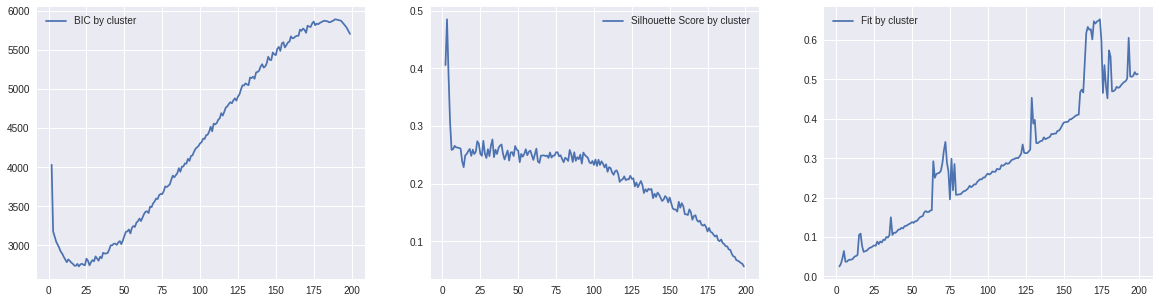

In [98]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

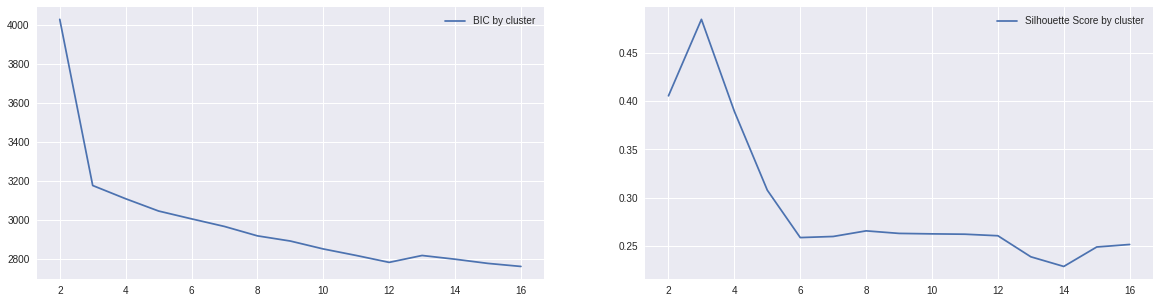

In [99]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.bic[:15], label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.sil_sc[:15], label='Silhouette Score by cluster')
ax[1].legend()

In [100]:
kmeans_sc_models_df.model.values[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

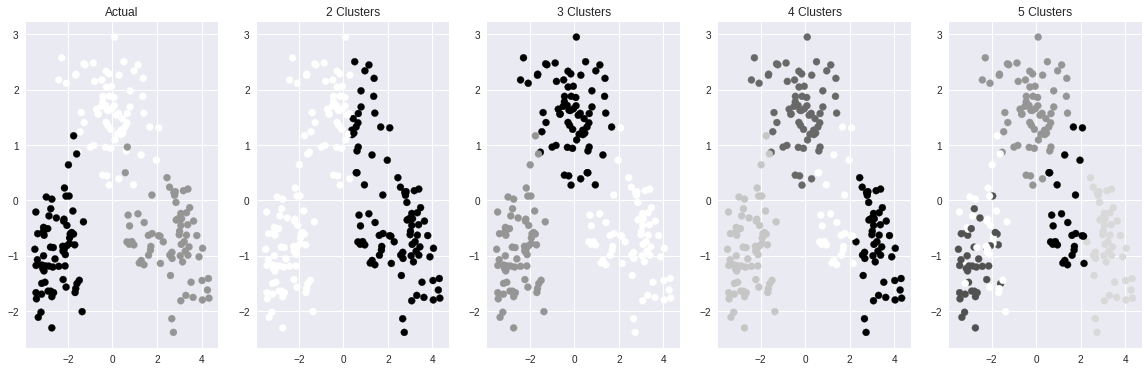

In [101]:
kmeans_2 = kmeans_sc_models_df.model.values[0]
kmeans_3 = kmeans_sc_models_df.model.values[1]
kmeans_4 = kmeans_sc_models_df.model.values[2]
kmeans_5 = kmeans_sc_models_df.model.values[3]

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

_, ax = plt.subplots(1,5, figsize=(20,6))
seeds_2d = pca.fit_transform(X_sc)
ax[0].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=seeds_df.target)
ax[0].set_title('Actual')
ax[1].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_2.labels_)
ax[1].set_title('2 Clusters')
ax[2].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_3.labels_)
ax[2].set_title('3 Clusters')
ax[3].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_4.labels_)
ax[3].set_title('4 Clusters')
ax[4].scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=kmeans_5.labels_)
ax[4].set_title('5 Clusters');

q3

Automatically created module for IPython interactive environment


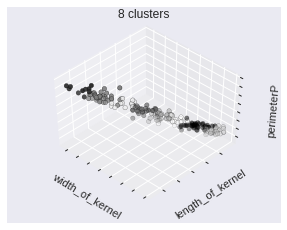

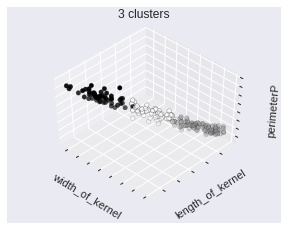

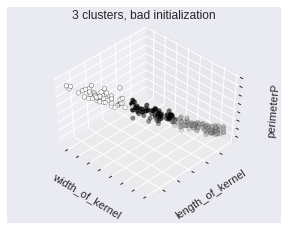

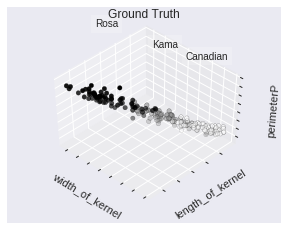

In [102]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

dataM = seeds_df[['areaA', 'perimeterP', 'length_of_kernel', 'width_of_kernel']].as_matrix()

#dataL = np.array([np.array(dataM) for i in dataM[i]])

X = dataM
y = targets

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,init='random'))
             ]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('width_of_kernel')
    ax.set_ylabel('length_of_kernel')
    ax.set_zlabel('perimeterP')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Kama', 0),
                    ('Rosa', 1),
                    ('Canadian', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('width_of_kernel')
ax.set_ylabel('length_of_kernel')
ax.set_zlabel('perimeterP')
ax.set_title('Ground Truth')
ax.dist = 12

In [103]:
dataM = seeds_df[['areaA', 'perimeterP', 'length_of_kernel']].as_matrix()

#dataL = np.array([np.array(dataM) for i in dataM[i]])

#np.array(seeds_df.target)
dataM

array([[ 15.26 ,  14.84 ,   5.763],
       [ 14.88 ,  14.57 ,   5.554],
       [ 14.29 ,  14.09 ,   5.291],
       [ 13.84 ,  13.94 ,   5.324],
       [ 16.14 ,  14.99 ,   5.658],
       [ 14.38 ,  14.21 ,   5.386],
       [ 14.69 ,  14.49 ,   5.563],
       [ 14.11 ,  14.1  ,   5.42 ],
       [ 16.63 ,  15.46 ,   6.053],
       [ 16.44 ,  15.25 ,   5.884],
       [ 15.26 ,  14.85 ,   5.714],
       [ 14.03 ,  14.16 ,   5.438],
       [ 13.89 ,  14.02 ,   5.439],
       [ 13.78 ,  14.06 ,   5.479],
       [ 13.74 ,  14.05 ,   5.482],
       [ 14.59 ,  14.28 ,   5.351],
       [ 13.99 ,  13.83 ,   5.119],
       [ 15.69 ,  14.75 ,   5.527],
       [ 14.7  ,  14.21 ,   5.205],
       [ 12.72 ,  13.57 ,   5.226],
       [ 14.16 ,  14.4  ,   5.658],
       [ 14.11 ,  14.26 ,   5.52 ],
       [ 15.88 ,  14.9  ,   5.618],
       [ 12.08 ,  13.23 ,   5.099],
       [ 15.01 ,  14.76 ,   5.789],
       [ 16.19 ,  15.16 ,   5.833],
       [ 13.02 ,  13.76 ,   5.395],
       [ 12.74 ,  13.67 ,   

In [104]:
seeds_df[['areaA', 'perimeterP', 'length_of_kernel']]

,areaA,perimeterP,length_of_kernel
0,15.26,14.84,5.763
1,14.88,14.57,5.554
2,14.29,14.09,5.291
3,13.84,13.94,5.324
4,16.14,14.99,5.658
5,14.38,14.21,5.386
6,14.69,14.49,5.563
7,14.11,14.10,5.420
8,16.63,15.46,6.053
9,16.44,15.25,5.884


In [105]:
#targets

In [106]:
#seeds_df.head(69)

In [107]:
#seeds_df

In [108]:
#seeds_numerical_df